# Compiled Data Analysis

## Pull in Data

In [55]:
%matplotlib inline

In [22]:
# import libraries
import os
import matplotlib.pyplot as plt
import numpy as np


In [29]:
# read in csv file
file = os.path.join("compileddata.csv")
df = pd.read_csv(file)
df = df.rename(columns={'Unnamed: 0': 'Index'})

In [32]:
# display
df.set_index('Index')
df.head()

,Index,year,district,campus,total_enroll,total_disadvtg,total_title1,total_atrisk,school_type,title1_rate
0,0,2014-2015,AUSTIN ISD,Austin High School,2085,599,11,792,High,0.527578
1,1,2014-2015,AUSTIN ISD,Lanier High School,1619,1386,1619,1220,High,100.000000
2,2,2014-2015,AUSTIN ISD,Mccallum High School,1648,524,33,677,High,2.002427
3,3,2014-2015,AUSTIN ISD,Reagan High School,1229,1012,1229,879,High,100.000000
4,4,2014-2015,AUSTIN ISD,Travis High School,1329,1138,1329,1019,High,100.000000


## Clean & Calculate Dataframe

Group data by tear and plot the rate of change in enrollment compared against total enrollment

In [149]:
# group by data
# year
year_df = df.groupby('year').sum()
# year and school type
year_type_df = df.groupby(['school_type', 'year']).sum()
year_df

,Index,total_enroll,total_disadvtg,total_title1,total_atrisk,title1_rate
year,,,,,,
2014-2015,8256,84540,50497,40299,44388,6720.035569
2015-2016,8385,83620,47826,45124,46012,7784.849738
2016-2017,8385,83066,44178,44373,43392,7780.102909
2017-2018,8256,81649,43477,42377,41823,7786.103760


In [310]:
# calculate rate of change
year_df['Rate_T1'] = (year_df['total_title1']/year_df['total_enroll'])*100
year_df['Rate_Total'] = (year_df['total_enroll']/year_df.iloc[0,1])*100
year_df['Rate_Total_yy'] = ((year_df['total_enroll']-year_df.iloc[0,1])/year_df.iloc[0,1])
year_df['Rate_T1_yy'] = ((year_df['Rate_T1']-year_df.iloc[0,6])/year_df.iloc[0,6])
year_df

,Index,total_enroll,total_disadvtg,total_title1,total_atrisk,title1_rate,Rate_T1,Rate_Total,Rate_Total_yy,Rate_T1_yy
year,,,,,,,,,,
2014-2015,8256,84540,50497,40299,44388,6720.035569,47.668559,100.000000,0.000000,0.000000
2015-2016,8385,83620,47826,45124,46012,7784.849738,53.963167,98.911758,-0.010882,0.132049
2016-2017,8385,83066,44178,44373,43392,7780.102909,53.418968,98.256447,-0.017436,0.120633
2017-2018,8256,81649,43477,42377,41823,7786.103760,51.901432,96.580317,-0.034197,0.088798


## Plot Data

Plot rate of change and title one percentages for school types per year

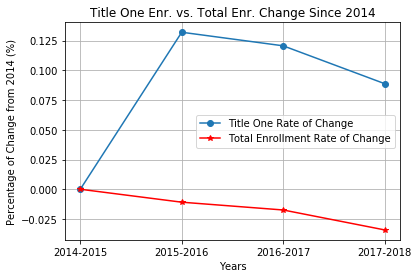

In [312]:

# plt.plot(year_df.index, year_df['total_enroll'])
plt.plot(year_df.index, year_df['Rate_T1_yy'], marker='o', label='Title One Rate of Change')
plt.plot(year_df.index, year_df['Rate_Total_yy'], marker='*', label='Total Enrollment Rate of Change', color='r')
plt.xlabel('Years')
plt.ylabel('Percentage of Change from 2014 (%)')
plt.title('Title One Enr. vs. Total Enr. Change Since 2014')
plt.legend()
plt.grid()

# export plot
plt.savefig("Austin_ISD_Clean/Images/Austin_ISD_Enrollment_Since_2011.png")

# display plot
plt.show()

In [315]:
# Caclulate and pull out column for percentage of title one students per year
year_type_df['T1_rate'] = (year_type_df['total_title1']/year_type_df['total_enroll'])*100
year_type_df
df_s = year_type_df['T1_rate']

df_s.head()

school_type  year     
Elementary   2014-2015    56.828184
             2015-2016    66.692512
             2016-2017    66.183163
             2017-2018    64.314865
High         2014-2015    26.884971
Name: T1_rate, dtype: float64

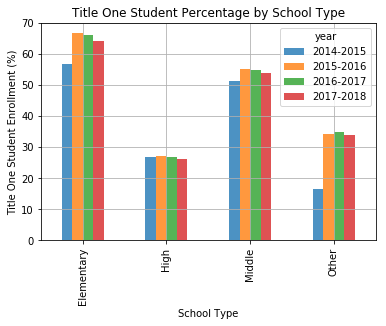

In [274]:
# plot types of school for each year
df_s.unstack().plot(kind='bar', alpha=0.8)
plt.xlabel('School Type')
plt.ylabel('Title One Student Enrollment (%)')
plt.title('Title One Student Percentage by School Type')
plt.grid()

# export data
plt.savefig("Austin_ISD_Clean/Images/Austin_ISD_Enrollment_Since_2011.png")

# display dataframe
plt.show()